## NBA Basketball - Offensive and Defensive Game Play

In [1]:
from pymongo import MongoClient
import pprint

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

# Requests sends and receives HTTP requests.
import requests

import json
import time
import copy

In [2]:
pd.set_option('display.max_columns', None)

In [ ]:
from nba_api.stats.static import teams
from nba_api.stats.static import players
from nba_api.stats.endpoints import leaguegamelog
from nba_api.stats.endpoints import leaguedashteamstats
from nba_api.stats.endpoints import boxscorefourfactorsv2

In [ ]:
teams_df = pd.DataFrame(teams.get_teams())
teams_df.head()

In [ ]:
player_df = pd.DataFrame(players.get_players())
player_df.head()

In [ ]:
#game_log_1819 = leaguegamelog.LeagueGameLog(counter = 0, direction = "DESC",
#                 league_id = "00", player_or_team_abbreviation = "T", season = "2018-19",
#                 season_type_all_star = "Regular Season", sorter = "DATE").get_data_frames()

In [ ]:
#game_log_1819[0].to_csv(r'../data_1/game_log_1819.csv', index=False)

In [3]:
game_log_1819 = pd.read_csv('../data_1/game_log_1819.csv')
game_log_1819.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,1610612763,MEM,Memphis Grizzlies,21801225,2019-04-10,MEM vs. GSW,W,240,48,98,0.490,21,46,0.457,15,18,0.833,15,34,49,25,9,0,11,18,132,15,1
1,22018,1610612744,GSW,Golden State Warriors,21801225,2019-04-10,GSW @ MEM,L,240,46,92,0.500,13,30,0.433,12,14,0.857,9,30,39,32,3,5,14,17,117,-15,1
2,22018,1610612753,ORL,Orlando Magic,21801222,2019-04-10,ORL @ CHA,W,240,48,88,0.545,11,30,0.367,15,20,0.750,9,30,39,24,5,2,6,19,122,8,1
3,22018,1610612766,CHA,Charlotte Hornets,21801222,2019-04-10,CHA vs. ORL,L,240,41,78,0.526,8,29,0.276,24,27,0.889,4,28,32,21,3,4,8,14,114,-8,1
4,22018,1610612750,MIN,Minnesota Timberwolves,21801228,2019-04-10,MIN @ DEN,L,240,39,91,0.429,13,32,0.406,4,6,0.667,7,34,41,24,6,0,10,22,95,-4,1


In [ ]:
#leaguedashteamstats = leaguedashteamstats.LeagueDashTeamStats(season = "2018-19", season_type_all_star='Regular Season').get_data_frames()

In [ ]:
#leaguedashteamstats[0].to_csv(r'../data_1/leaguedashteamstats.csv', index=False)

In [4]:
leaguedashteamstats = pd.read_csv('../data_1/leaguedashteamstats.csv')
leaguedashteamstats.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,82,29,53,0.354,3971.0,3392,7524,0.451,1067,3034,0.352,1443,1918,0.752,955,2825,3780,2118,1397.0,675,419,448,1932,1817,9294,-494.0,1,26,26,26,7,15,4,21,4,3,16,18,12,21,4,18,12,10,30,11,14,24,29,5,12,26,10,Atlanta Hawks
1,1610612738,Boston Celtics,82,49,33,0.598,3956.0,3451,7423,0.465,1032,2829,0.365,1282,1598,0.802,804,2849,3653,2155,1052.0,706,435,317,1670,1602,9216,364.0,1,9,9,9,18,11,9,14,6,7,7,28,29,4,20,16,22,5,3,4,10,2,12,26,14,6,10,Boston Celtics
2,1610612751,Brooklyn Nets,82,42,40,0.512,3996.0,3301,7358,0.449,1047,2965,0.353,1555,2088,0.745,900,2919,3819,1954,1236.0,539,339,432,1763,1807,9204,-6.0,1,14,14,14,1,20,14,25,5,5,14,6,4,24,10,10,7,21,26,27,28,22,23,7,15,15,10,Brooklyn Nets
3,1610612766,Charlotte Hornets,82,39,43,0.476,3966.0,3297,7362,0.448,977,2783,0.351,1510,1895,0.797,814,2778,3592,1905,1001.0,591,405,492,1550,1686,9081,-90.0,1,17,17,17,11,21,12,26,11,10,18,9,16,6,19,22,23,24,2,21,18,29,3,18,19,18,10,Charlotte Hornets
4,1610612741,Chicago Bulls,82,22,60,0.268,3981.0,3266,7205,0.453,745,2123,0.351,1328,1695,0.783,718,2799,3517,1796,1159.0,603,351,473,1663,1534,8605,-690.0,1,27,27,27,3,23,22,20,30,27,19,25,26,11,30,21,25,27,19,20,26,28,9,30,27,27,10,Chicago Bulls


In [ ]:
#boxscorefourfactor = boxscorefourfactorsv2.BoxScoreFourFactorsV2(game_id='0021800997').get_data_frames()

In [ ]:
#boxscorefourfactor[0].to_csv(r'../data_1/boxscorefourfactor.csv', index=False)

In [5]:
boxscorefourfactor = pd.read_csv('../data_1/boxscorefourfactor.csv')
boxscorefourfactor.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT
0,21800997,1610612745,HOU,Houston,201569,Eric Gordon,F,NaN,31:48,0.432,0.220,0.099,0.286,0.459,0.224,0.214,0.261
1,21800997,1610612745,HOU,Houston,200782,P.J. Tucker,F,NaN,37:51,0.471,0.286,0.141,0.293,0.441,0.339,0.206,0.345
2,21800997,1610612745,HOU,Houston,203991,Clint Capela,C,NaN,35:39,0.409,0.242,0.155,0.302,0.464,0.321,0.197,0.280
3,21800997,1610612745,HOU,Houston,201935,James Harden,G,NaN,33:55,0.467,0.328,0.143,0.278,0.510,0.294,0.220,0.320
4,21800997,1610612745,HOU,Houston,101108,Chris Paul,G,NaN,32:50,0.452,0.242,0.148,0.282,0.490,0.353,0.194,0.217


### General Dataset Information

In [ ]:
game_log_1819.shape

In [ ]:
game_log_1819.info()

In [ ]:
game_log_1819.describe()

In [ ]:
leaguedashteamstats.shape

In [ ]:
leaguedashteamstats.info()

In [ ]:
leaguedashteamstats.describe()

In [ ]:
boxscorefourfactor.shape()

In [ ]:
boxscorefourfactor.info()

In [ ]:
boxscorefourfactor.describe()

### Dataset Preparation


### Exploratory Data Analysis

In [ ]:
game_log_1819.head()

In [ ]:
game_groupby_team = game_filter_wins.groupby(
    ['TEAM_ABBREVIATION']).agg({'WL': 'count'})
game_groupby_team

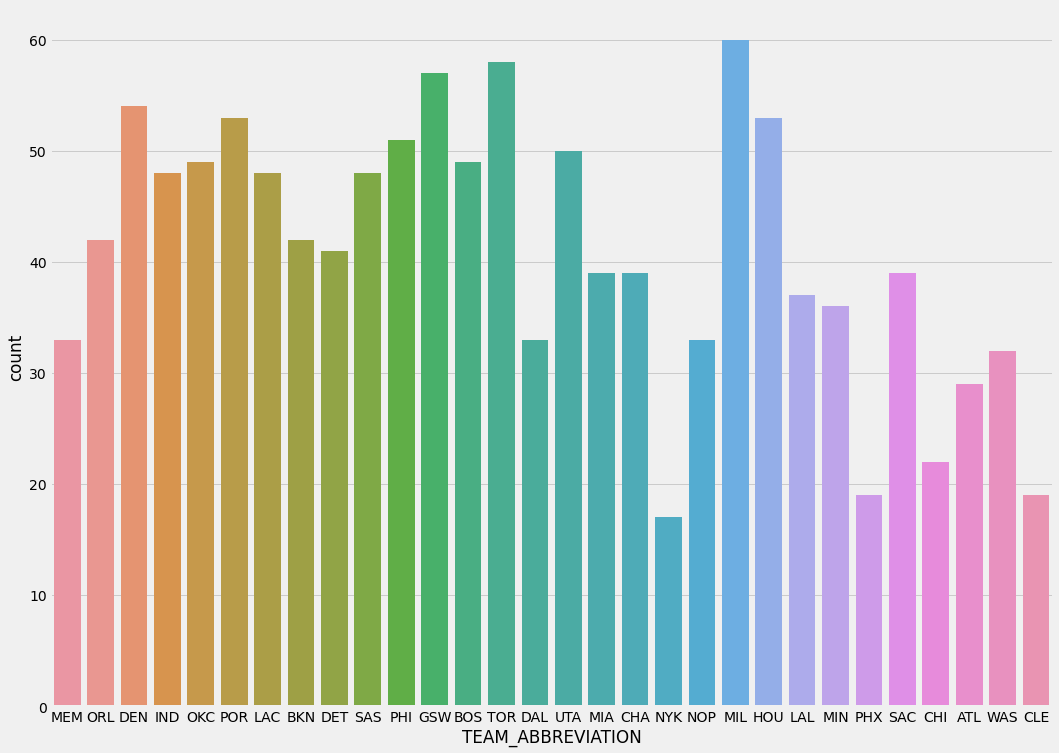

In [6]:
game_win_query = game_log_1819.query('WL == "W"')
fig, ax = plt.subplots(figsize=(16,12))
sns.countplot(x='TEAM_ABBREVIATION', data=game_win_query, ax=ax);

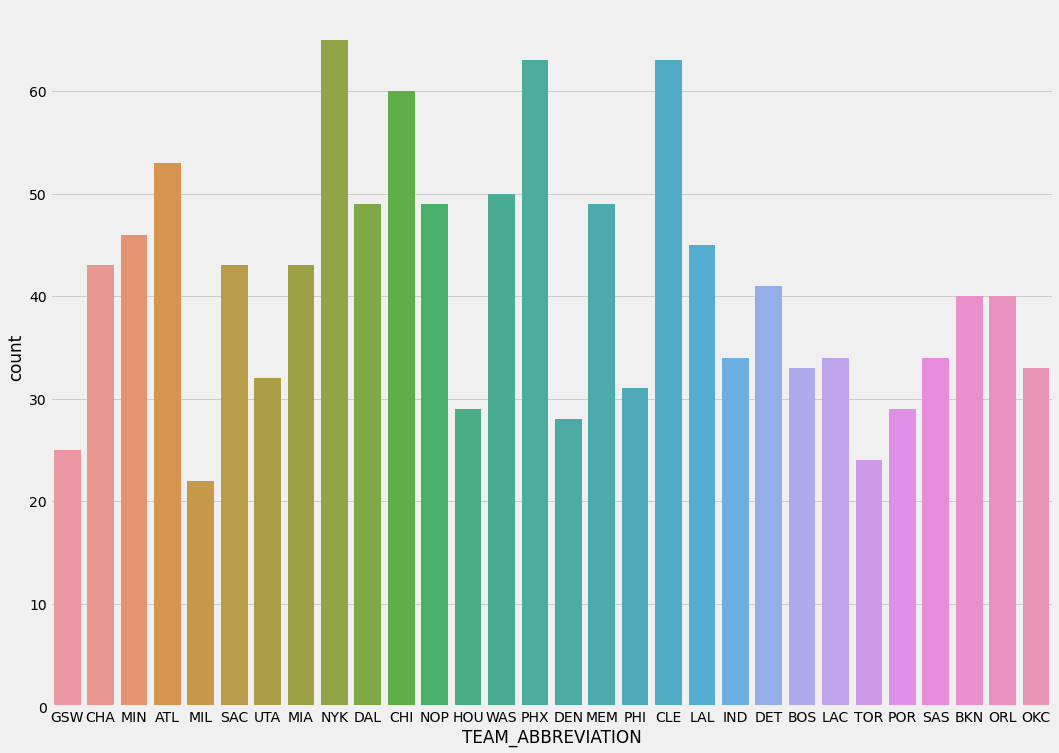

In [7]:
game_loss_query = game_log_1819.query('WL == "L"')
fig, ax = plt.subplots(figsize=(16,12))
sns.countplot(x='TEAM_ABBREVIATION', data=game_loss_query, ax=ax);

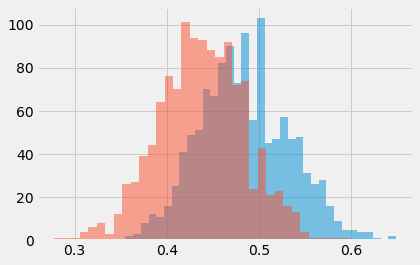

In [8]:
fig, ax = plt.subplots()
ax.hist(game_win_query['FG_PCT'], alpha=0.5, bins=35)
ax.hist(game_loss_query['FG_PCT'], alpha=0.5, bins=35);

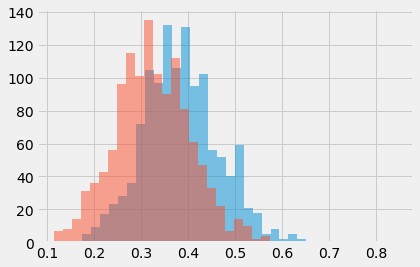

In [9]:
fig, ax = plt.subplots()
ax.hist(game_win_query['FG3_PCT'], alpha=0.5, bins=35)
ax.hist(game_loss_query['FG3_PCT'], alpha=0.5, bins=35);

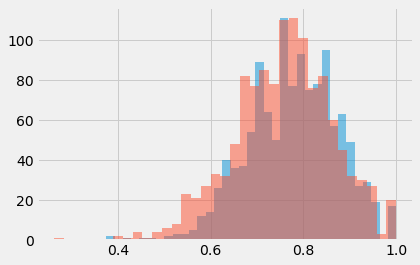

In [10]:
fig, ax = plt.subplots()
ax.hist(game_win_query['FT_PCT'], alpha=0.5, bins=35)
ax.hist(game_loss_query['FT_PCT'], alpha=0.5, bins=35);

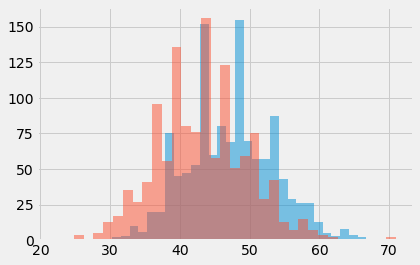

In [11]:
fig, ax = plt.subplots()
ax.hist(game_win_query['REB'], alpha=0.5, bins=35)
ax.hist(game_loss_query['REB'], alpha=0.5, bins=35);

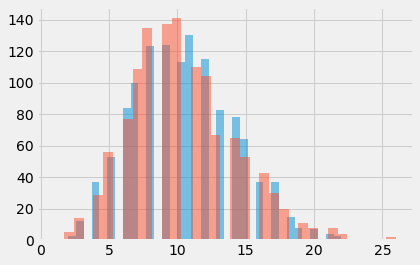

In [12]:
fig, ax = plt.subplots()
ax.hist(game_win_query['OREB'], alpha=0.5, bins=35)
ax.hist(game_loss_query['OREB'], alpha=0.5, bins=35);

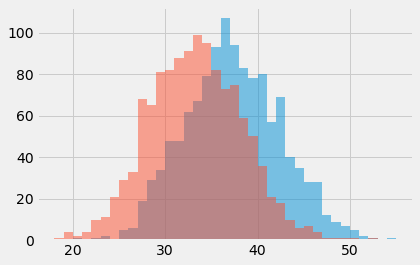

In [13]:
fig, ax = plt.subplots()
ax.hist(game_win_query['DREB'], alpha=0.5, bins=35)
ax.hist(game_loss_query['DREB'], alpha=0.5, bins=35);

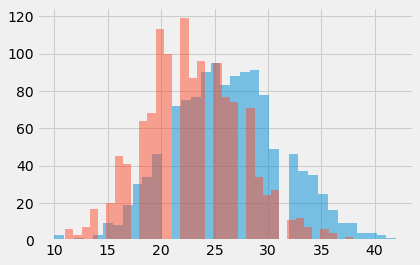

In [14]:
fig, ax = plt.subplots()
ax.hist(game_win_query['AST'], alpha=0.5, bins=35)
ax.hist(game_loss_query['AST'], alpha=0.5, bins=35);

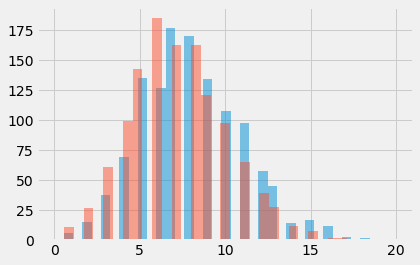

In [15]:
fig, ax = plt.subplots()
ax.hist(game_win_query['STL'], alpha=0.5, bins=35)
ax.hist(game_loss_query['STL'], alpha=0.5, bins=35);

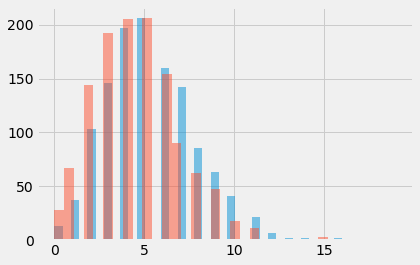

In [16]:
fig, ax = plt.subplots()
ax.hist(game_win_query['BLK'], alpha=0.5, bins=35)
ax.hist(game_loss_query['BLK'], alpha=0.5, bins=35);

In [ ]:
fig, ax = plt.subplots()
ax.hist(game_win_query['TOV'], alpha=0.5, bins=35)
ax.hist(game_loss_query['TOV'], alpha=0.5, bins=35);

In [ ]:
fig, ax = plt.subplots()
ax.hist(game_log_1819['FGA'], bins=50)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.hist(game_log_1819['FGM'], bins=50)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.hist(game_log_1819['FG_PCT'], bins=50)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(game_log_1819['FGA'], game_log_1819['FGM'])
ax.set_xlabel('Field Goals Attempted')
ax.set_ylabel('Field Goals Made')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(game_log_1819['FG3A'], game_log_1819['FG3M'])
ax.set_xlabel('3-Point Field Goals Attempted')
ax.set_ylabel('3-Point Field Goals Made')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(game_log_1819['OREB'], game_log_1819['DREB'])
ax.set_xlabel('Offensive Rebounds')
ax.set_ylabel('Defensive Rebounds')
plt.show()

### Hypothesis Tests

**Scientific question:** Is there a play between offensive and defensive play that is more effective in achieving a game win?

**Null:** There is no difference between the impact of offensive or defensive play in achieving a game win.

**Alternative:** There is a difference between the impact of offensive or defensive play in achieving a game win.

**Test statistic:** 2,460 regular season games from the 20xx - xx NBA season
(=82 games per team * 30 NBA teams)

Dataset: using proxies, such as either offensive (ORtg) and defensive (DRtg) ratings or offense and defense four factors, for efficient offensive and defensive play respectively

### Conclusion